In [1]:
%matplotlib inline

import tensorflow as tf

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

import numpy as np
from numpy.random import seed, randint

# Getting the data

This digit is 8


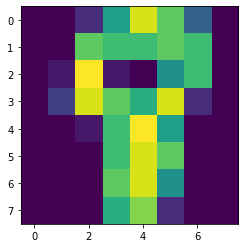

In [2]:
digits = load_digits()

a = randint(low = 0, high = 1796)
plt.imshow(digits.images[a])
print("This digit is {}".format(digits.target[a]))

# Training the neural network

In [3]:
num_classes = 10
X = digits.data
y = digits.target
Y = to_categorical(y, num_classes)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify = Y)
input_size = X[0].shape[0]

In [4]:
seed(0)
tf.random.set_seed(0)

callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 10)

model = Sequential() #initialize a neural network

model.add(Dense(units = 16, activation = 'tanh', input_dim = input_size,
                kernel_regularizer=regularizers.l2(0.001))) #add a hidden layer
model.add(Dropout(0.2)) #dropout 20 % of the connections
model.add(Dense(units = num_classes, activation = 'softmax')) #add the output layer

sgd = optimizers.SGD(learning_rate = 0.1)
model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])

history = model.fit(X_train, Y_train, epochs = 200, batch_size = 50, verbose = 0, 
                    validation_split = 0.2, callbacks = [callback])

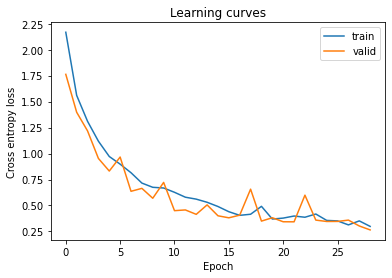

In [5]:
plt.figure()
plt.title("Learning curves")
plt.xlabel("Epoch")
plt.ylabel("Cross entropy loss")
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'valid')
plt.legend()
plt.show()

In [6]:
print("Loss + accuracy on train data: {}".format(model.evaluate(X_train, Y_train)))
print("Loss + accuracy on test data: {}".format(model.evaluate(X_test, Y_test)))

43/43 [==============================] - 0s 626us/step - loss: 0.1874 - accuracy: 0.9666
Loss + accuracy on train data: [0.1873990148305893, 0.9665924310684204]
15/15 [==============================] - 0s 673us/step - loss: 0.3064 - accuracy: 0.9222
Loss + accuracy on test data: [0.3063678741455078, 0.9222221970558167]


# Consider misclassified digits

In [7]:
probabilities = np.array(model.predict(X_test))
predictions = np.argmax(probabilities, axis = 1) #what does the model predict
labels = np.argmax(Y_test, axis = 1) #what are the actual labels

print("Predictions = {}".format(predictions[0:30]))
print("Labels      = {}".format(labels[0:30]))

15/15 [==============================] - 0s 567us/step
Predictions = [6 6 6 7 0 4 9 7 9 7 2 3 0 3 2 4 6 1 4 7 2 6 2 5 0 1 3 0 3 6]
Labels      = [6 6 6 7 0 4 9 7 9 7 2 3 0 3 2 4 6 1 4 7 2 6 5 5 0 1 3 0 3 6]


This digit is 5, but classified as 2.


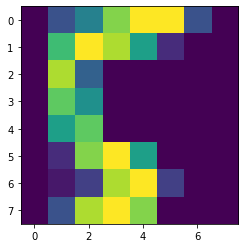

In [8]:
misclas_idxs = np.argwhere(predictions != labels)

b = randint(low = 0, high = len(misclas_idxs) - 1) #choose a random index
a = misclas_idxs[b][0] # find out what image that index is
plt.imshow(np.reshape(X_test[a], (8,8)))
print("This digit is {}, but classified as {}.".format(labels[a], predictions[a]))